В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [728]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [729]:
df = pd.read_csv('data/cars.csv')

In [730]:
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [731]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [732]:
df.Fuel_Type.nunique(), df.Transmission.nunique()

(2, 2)

In [733]:
df.Car_ID.nunique(), df.Brand.nunique(), df.Model.nunique(),  

(100, 11, 58)

In [734]:
df.Owner_Type.nunique(), df.Seats.nunique(), df.Year.nunique()

(3, 3, 6)

```
В наборі даних 5 числових і 8 категоріальних колонок з них:
- 2 бінарні (мають лише 2 значення) - Fuel_Type та Transmission 
- 3 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку - Car_ID, Brand та Model
- 3 колонки, в яких можна встановити відношення порядку - Owner_Type, Seats та Year
```

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [735]:
targets = df.Price
inputs = df[['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 
             'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [736]:
X_train.Fuel_Type.value_counts()

Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64

In [737]:
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}

X_train['Is_Petrol'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Is_Petrol'] = X_test.Fuel_Type.map(Fuel_Type_codes)

In [738]:
X_train.Transmission.value_counts()

Transmission
Automatic    49
Manual       31
Name: count, dtype: int64

In [739]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Is_Automatic'] = X_train.Transmission.map(Transmission_codes)
X_test['Is_Automatic'] = X_test.Transmission.map(Transmission_codes)

In [740]:
enc = OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [741]:
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

In [742]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [743]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head());

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [744]:
df_train = pd.concat([X_train.select_dtypes(include='number'), y_train], axis=1)
corr_train = df_train.corr()

corr_train.style.background_gradient()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Is_Petrol,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Is_Automatic,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


In [745]:
mask_05 = (corr_train['Price'] > 0.5) | (corr_train['Price'] < -0.5)
filtered_05_corr_train = corr_train.loc[mask_05, ['Price']]

filtered_05_corr_train.style.background_gradient()

,Price
Mileage,-0.638404
Engine,0.710561
Power,0.849137
Is_Automatic,0.680731
Price,1.000000


**Висновок:** Колонки Mileage, Engine, Power, Is_Automatic та Price корелюють з цільовою змінною на більш ніж 0.5 за модулем.Це означає, що ці параметри сильніше впливатимуть на цільову змінну - Price. Також я би ще глянула на колоки, які корелюють за модулем більше, ніж на 0.4.

In [746]:
mask_04 = ((corr_train['Price'] <= 0.5) & (corr_train['Price'] > 0.4)) | ((corr_train['Price'] >= -0.5) & (corr_train['Price'] < -0.4))
filtered_04_corr_train = corr_train.loc[mask_04, ['Price']]

filtered_04_corr_train.style.background_gradient()

,Price
BMW,0.477522
Mercedes,0.431606


**Висновок:** Колонки 'BMW' та 'Mercedes' корелюють більше ніж на 0.4.

**Завдання 6**. Тренуємо лінійну регресію.

0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [747]:
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

In [748]:
# Створюю і треную модель
model = LinearRegression().fit(X_train, y_train)

# Передбачення моделі на X_train
predictions_train = model.predict(X_train)

# Передбачення моделі на X_test
predictions_test = model.predict(X_test)

In [749]:
# root mean squared error відхилення на X_train
loss_train = mean_squared_error(y_train, predictions_train, squared=False)

# root mean squared error відхилення на X_test
loss_test = mean_squared_error(y_test, predictions_test, squared=False)

loss_train, loss_test

(210342.8016204643, 259601.26542723566)

In [750]:
predictions_train.mean(), predictions_train.min(), predictions_train.max()

(1680000.000000003, 190972.02618638054, 3653360.392592404)

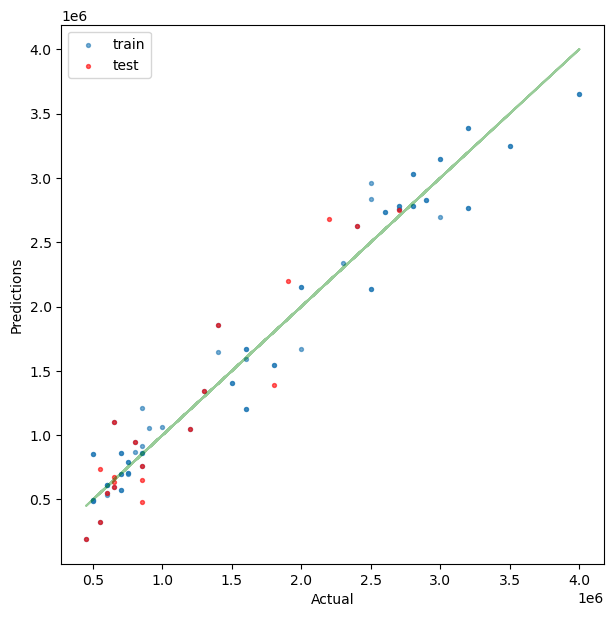

In [751]:
plt.figure(figsize=(7, 7)) 

plt.scatter(y_train, predictions_train, s=8, alpha=0.6);
plt.scatter(y_test, predictions_test, s=8, alpha=0.6, color='red');
plt.plot(y_train, y_train, 'g', alpha=0.4)
plt.xlabel('Actual');
plt.ylabel('Predictions');
plt.legend(['train', 'test']);

**Висновок:** середньоквадратична похибка передбачення від справжніх значень цільової змінної на тренувальних даних склала 210342, а на тестових даних трохи більше - 259601, що вцілому є відносно невеликою різницею. З графіку розсіювання також видно, що тренувальні та тестові результати знаходяться на приблизно однакових відстаннях від справжніх значень цільової змінної. З цього можна зробити висновок, що модель є хорошою.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [752]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [753]:
# Створюю модель
model_with_scaled = LinearRegression().fit(X_train_scaled, y_train)

In [754]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model_with_scaled.coef_, model_with_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,1.680000e+06
4,Power,5.000005e+05
15,Mercedes,2.092577e+05
9,BMW,2.081051e+05
8,Audi,2.061231e+05
7,Is_Automatic,1.151534e+05
19,Owner_Type_Codes,4.333507e+04
17,Toyota,1.761943e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


**Висновок:** найвпливовішими на формування передбачення з точки зору коефіцієнтів є вільний член (константа) та колонки Power, Mercedes, BMW, Audi, Is_Automatic, у них додатній напрям дії, а також колонки з від'ємним напрямом дії - Mileage, Mahindra, Hyundai та Is_Petrol. Це означає, що машини марок Mercedes, BMW та Audi будуть впливати на збільшення ціни. Також на збільшення ціни впливатиме потужність автомобіля в кінських силах. Щодо від'ємних коефіцієнтів, то машини марок Mileage, Mahindra та Hyundai будуть впливати на зниження ціни. Також на зниження ціни впливатиме пробіг, чим більший пробіг - тим менша ціна. Коєфіцієнти є логічними з точки зору значення відповідних змінних.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [755]:
# Добавляю назви колонок до відмасштабованих тренувальних параметрів 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [756]:
X = sm.add_constant(X_train_scaled_df)
model = sm.OLS(y_train.values, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.34e-34
Time:                        22:18:18   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+0

In [758]:
significant_features_005 = results.pvalues[results.pvalues < 0.05].index
significant_features_025 = results.pvalues[results.pvalues < 0.25].index
print(significant_features_005)

Index(['const', 'Mileage', 'Power', 'Is_Petrol', 'Is_Automatic', 'Audi', 'BMW',
       'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen'],
      dtype='object')


**Висновок:** Стат. значущими на рівні значущості 0.05 є ознаки 'const', 'Mileage', 'Power', 'Is_Petrol', 'Is_Automatic', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Volkswagen'. Це сходится з висновком, що був зроблений вище на основі коефіцієнтів моделі.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [759]:
X = sm.add_constant(X_train_scaled_df)
model = sm.OLS(y_train.values, X[significant_features_005])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 31 May 2024   Prob (F-statistic):           4.12e-39
Time:                        22:18:34   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.68e+06   2.78e+04     60.360   

**Висновок:** Значення R2 і Adj. R-squared були 0.959 та 0.946 відповідно. Коли я використала для побудови моделі лише стат. значущі ознаки, то значення змінились на 0.951 та 0.943, що є незначною зміною і вказує на те, що можна не передавати не стат. значущі ознаки в модель.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [762]:
X = sm.add_constant(X_train_scaled_df)
model = sm.OLS(y_train.values, X[significant_features_025])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Fri, 31 May 2024   Prob (F-statistic):           4.85e-38
Time:                        22:19:19   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

In [764]:
len(significant_features_005), len(significant_features_025), len(X_train_scaled_df.columns)

(13, 16, 20)

**Висновок:** Значення R2 і Adj. R-squared були 0.959 та 0.946 відповідно. Коли я використала для побудови моделі лише стат. значущі ознаки, то значення змінились на 0.958 та 0.948, що є майже непомітною зміною. Я би обрала 3-тю модель для використання, оскільки тут лише на 3 параметри більше порівняно із 2-ою моделлю, і на 4-ри менше порівнянно із 1-ою. А модель пояснює зміну практично так само добре, як і перша, що навчалась на усіх доступних параметрах. Проте, якщо це значно впливатиме на продуктивність в порівнянні із другою, тоді можна використати другу також, оскільки її ефективність зовсім трохи менша, ніж у 1-ої та 3-ьої.